In [155]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("notebook", font_scale=1.5)

#from bqplot import pyplot as plt
from matplotlib import dates as mdates
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
!ls ../data/processed/scrape/4*

../data/processed/scrape/4-4:
day-agg.csv
day-lang-agg.csv
jan-archive.tar.bzip2

../data/processed/scrape/4-5:
all-gps.csv


### Languages

In [3]:
lang_f = '../data/processed/scrape/4-4/day-lang-agg.csv'
lang_df = pd.read_csv(lang_f)

lang_df.head()

,day,language,count
0,2016-12-22,ar,4232
1,2016-12-22,ca,5
2,2016-12-22,cs,1
3,2016-12-22,de,90
4,2016-12-22,el,3


In [68]:
# sums of counts
language_total_count = lang_df[['language', 'count']].groupby('language').agg('sum')

# ...Sorted in order
language_total_count = language_total_count.reset_index().sort_values('count', ascending=False)
language_total_count.columns = ['language', 'tweets']

**Which language contributed the most tweets to our dataset?**

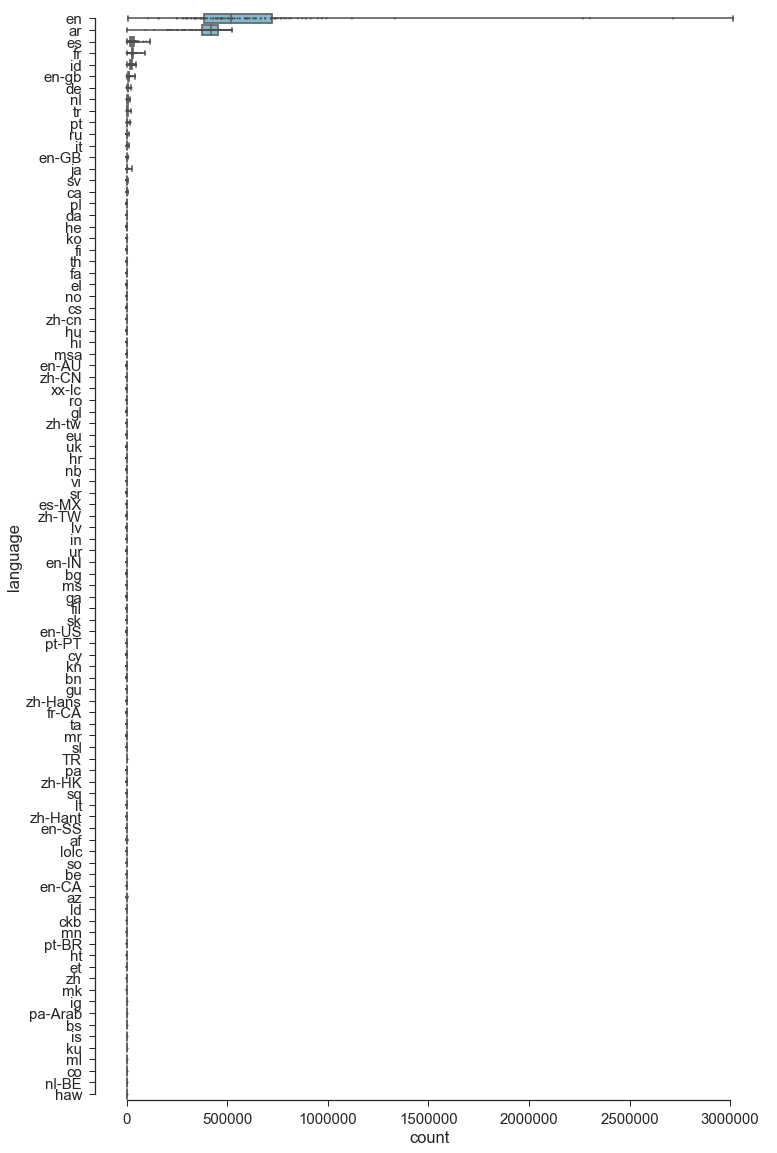

In [94]:
plt.figure(figsize=(12, 20))

ax = sns.boxplot(x='count', y='language', data=lang_df,
                 order=language_total_count.language.tolist(),
                whis=np.inf, color="c")

sns.stripplot(x='count', y='language', data=lang_df,
              order=language_total_count.language.tolist(),
             color='.3', linewidth=0, size=2)

#ax.set_xscale('log')
sns.despine(trim=True)

In [6]:
### Aliases

def assign_alias(lang):
    aliases = {
        'ar': 'Arabic',
        'en': 'English',
        'en-AU': 'English',
        'en-CA': 'English',
        'en-gb': 'English',
        'en-in': 'English',
        'en-US': 'English',
        'es': 'Spanish',
        'es-MX': 'Spanish',
        'fr': 'French',
        'fr-CA': 'French',
        'id': 'Indian'
    }
    try:
        return aliases[lang]
    except:
        return None

# Create new column
lang_df['alias'] = lang_df.language.map(assign_alias)

In [7]:
# aliases
alias_df = lang_df[pd.notnull(lang_df.alias)]

# sums of counts
alias_total_count = alias_df[['alias', 'count']].groupby('alias').agg('sum')

# ...Sorted in order
alias_total_count = alias_total_count.reset_index().sort_values('count', ascending=False)

**Which (grouped) languages are showing?**

In [12]:
### Ban day

def assign_ban_day(day):
    if day == '2017-01-29':
        return True
    else:
        return False
    
alias_df['ban_day'] = alias_df.day.map(assign_ban_day)
lang_df['ban_day'] = lang_df.day.map(assign_ban_day)

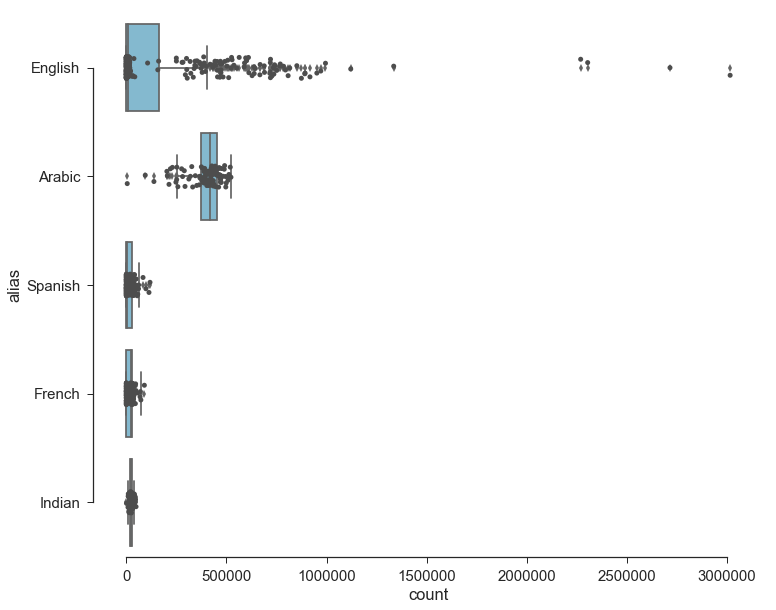

In [93]:
plt.figure(figsize=(12, 10))

ax = sns.boxplot(x='count', y='alias', data=alias_df,
                 order=alias_total_count.alias.tolist(),
                 color="c")

sns.stripplot(x='count', y='alias', data=alias_df,
              order=alias_total_count.alias.tolist(),
             color='.3', linewidth=0, 
              size=5, jitter=True)

#ax.set_xscale('log')
sns.despine(trim=True)

In [92]:
day_lang_counts = lang_df[['day', 'language']].groupby('day').language.nunique()

print ('Number of unique languages: {}'.format(lang_df.language.nunique()))
print ('Most common: {}, with {} tweets.'.format(language_total_count.language.iloc[0],
                                                language_total_count['tweets'].iloc[0]))
print ('Average number of languages seen per day: {}'.format(day_lang_counts.mean()))

Number of unique languages: 94
Most common: en, with 64925541 tweets.
Average number of languages seen per day: 61.81730769230769


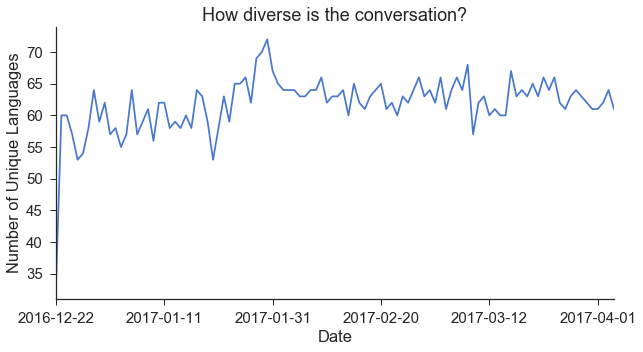

In [90]:
plt.figure(figsize=(10, 5))
ax = day_lang_counts.plot()

plt.title('How diverse is the conversation?')
plt.xlabel('Date')
plt.ylabel('Number of Unique Languages')
sns.despine()

### Dates

In [256]:
dates = pd.to_datetime(lang_df.day)

count_by_day = lang_df[['day', 'count']].groupby('day').agg('sum')
count_by_day.reset_index(inplace=True)

In [257]:
print ('There are {} unique days in the dataset.'.format(dates.nunique()))
earliest_date = dates.min().date()
print ('Earliest date: {}'.format(earliest_date))
latest_date = dates.max().date()
print ('Latest date: {}'.format(latest_date))

most_tweeted_day = count_by_day.iloc[count_by_day['count'].idxmax()]
print ('Day with most tweets: {}'.format(most_tweeted_day['day']))
print ('... It had {} tweets'.format(most_tweeted_day['count']))

There are 104 unique days in the dataset.
Earliest date: 2016-12-22
Latest date: 2017-04-04
Day with most tweets: 2017-01-29
... It had 3708254 tweets


In [253]:
xticks

[Timestamp('2016-12-31 00:00:00', freq='M'),
 Timestamp('2017-01-31 00:00:00', freq='M'),
 Timestamp('2017-02-28 00:00:00', freq='M'),
 Timestamp('2017-03-31 00:00:00', freq='M'),
 Timestamp('2017-04-30 00:00:00', freq='M')]

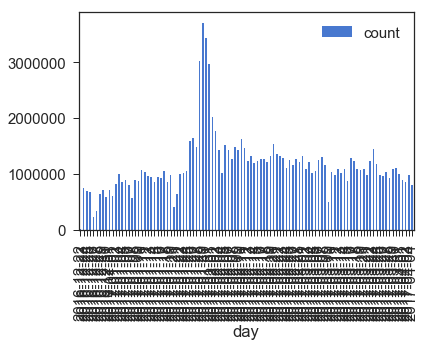

In [271]:
count_by_day.plot.bar('day', 'count')

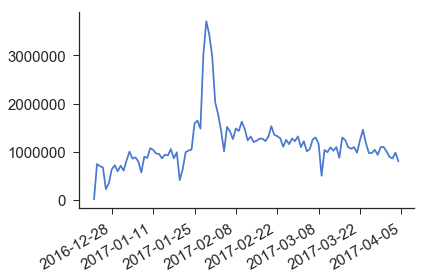

In [268]:
count_by_day.index = pd.to_datetime(count_by_day.day, format='%Y-%m-%d')


fig, ax = plt.subplots()
#ax.plot('count', data=count_by_day)


#xticks = pd.date_range(earliest_date, latest_date, freq='M')
ax.xticks = xticks
fig.autofmt_xdate()

sns.despine()

### GPS

In [21]:
gps_f = '../data/processed/scrape/4-5/all-gps.csv'
gps_df = pd.read_csv(gps_f, parse_dates=['day'],
                         infer_datetime_format=True)

gps_df.head(2)

,day,language,gps,wo_gps
0,2016-12-22,ar,348,8464
1,2016-12-22,ca,0,10


In [22]:
# calculate the real values for the gps
gps_df.rename(columns={'wo_gps': 'total'}, inplace=True)
gps_df.wo_gps = gps_df.total - gps_df.gps